## Аналитика в авиакомпании

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

#### Задача

    Изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.


### Описание данных


База данных об авиаперевозках:


#### Таблица airports — информация об аэропортах:
- airport_code — трёхбуквенный код аэропорта
- airport_name — название аэропорта
- city — город
- timezone — временная зона

#### Таблица aircrafts — информация об самолётах:
- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов

#### Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира

#### Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта

#### Таблица ticket_flights — стыковая таблица «рейсы-билеты»
- ticket_no — номер билета
- flight_id — идентификатор рейса

#### Таблица festivals — информация о фестивалях
- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля

## Оглавление

### Глава 1. Загрузка библиотек и данных
    - Импорт библиотек и изучение данных
    - Вывод

### Глава 2. Исследовательский анализ данных
    - Оценка популярных городов по количеству рейсов
    - Оценка моделей самолетов и количества рейсов
    - Оценка городов по количеству рейсов
    - Вывод
    
### Глава 3. Проверка гипотез
    - Гипотеза: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
    
### Финальный вывод
    

#### Преамбула
В предыдущей работе мы подготовили данные для анализа:
- Собрали данные о 10 крупнейших фестивалях 2018 года с сайта: https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html
- Нашли количество рейсов для каждой модели самолета в сентябре 2018 
- Посчитали количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре
- Посчитали среднее количество прибывающих рейсов в день для каждого города за август 2018 года
- Установили фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили
- Посчитали количество билетов для каждой недели с 23 июля по 30 сентября 2018 года, купленных на рейсы в Москву
- Составили таблицу с информацией о количестве купленных за неделю билетов и отметкой, проходил ли в эту неделю фестиваль 

## Глава 1. Загрузка библиотек и данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
from scipy import stats as st

In [2]:
# Загружам датасеты
flights_amount = pd.read_csv('/datasets/query_1.csv')
average_flights_city = pd.read_csv('/datasets/query_3.csv')

In [3]:
# Изучаем общую информацию о фремах
for i in [flights_amount,average_flights_city]:
    print(i.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None



In [4]:
flights_amount.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [5]:
average_flights_city.isnull().sum()

city               0
average_flights    0
dtype: int64

In [6]:
flights_amount.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [7]:
average_flights_city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


#### Вывод
Количество и названия столбцов в двух датафреймах совпадает с заявленными. Пропуски в значениях не обнаружены. Изменения типов данных не требуется. 

### Глава 2. Исследовательский анализ данных

### Оценка популярных городов по количеству рейсов

In [8]:
top10_city_flights = (average_flights_city.pivot_table(index='city', values='average_flights', aggfunc='sum')
                      .sort_values('average_flights', ascending=False).head(10))

In [9]:
top10_city_flights

,average_flights
city,
Москва,129.774194
Санкт-Петербург,31.161290
Новосибирск,17.322581
Красноярск,11.580645
Екатеринбург,11.322581
Ростов-на-Дону,10.193548
Пермь,10.129032
Брянск,10.000000
Сочи,9.612903


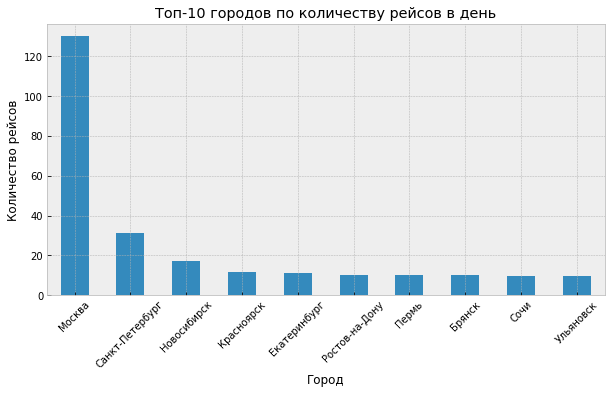

In [10]:
plt.style.use('bmh')
(top10_city_flights.plot(kind='bar', title='Топ-10 городов по количеству рейсов в день', y='average_flights', 
                         figsize=(10, 5), legend=False, rot=45)
                   .set(xlabel='Город', ylabel='Количество рейсов'))
plt.show()

Согласно полученным данным, за указанный период количество рейсов преобладает в Москве. Далее идут Санкт-Петербург и Новосибирск. Остальные города имеют примерно одинаковые значения по количеству рейсов. Возможно, такое распределение связано с разницей в количестве активных аэропортов в разных городах. Если в Москве их 5, а в Санкт-Петербурге 3 (у двух неудобное расположение до центра города), то в других городах по одному. 

Также, необходимо учитывать развитие авто и железнодорожного транспорта.


### Оценка моделей самолетов и количества рейсов

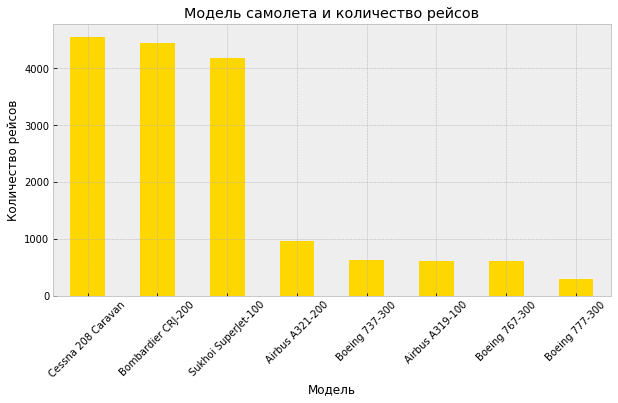

In [11]:
top_model_flights = (flights_amount.pivot_table(index='model', values='flights_amount')
                     .sort_values('flights_amount', ascending=False)
                     .plot(kind='bar', title='Модель самолета и количество рейсов', y='flights_amount', 
                     figsize=(10, 5), legend=False, color='gold', rot=45)
                    .set(xlabel='Модель', ylabel='Количество рейсов'))


Самые распространенные по количеству рейсов следующие модели:

1. Cessna 208 Caravan

2. Bombardier CRJ-200

3. Sukhoi Superjet-100

Возможно, у компаний использующих данные модели самолетов и сайтов-агрегаторов по продаже билетов — выгодные условия. Например, модель Boeing 737 часто используется компанией «Аэрофлот» и имеет выскоие цены даже на внутренние рейсы. Модель Airbus несмотря на мобильность, имеет много негативных отзывов. 

Также, мы дожны учитывать, что представленные данные взяты за 2018 год. Катастрофа с Sukhoi Superjet-100 еще не произошла (2019 год). После нее эксплуатация данной модели будет существенно снижена.



### Оценка городов по количеству рейсов

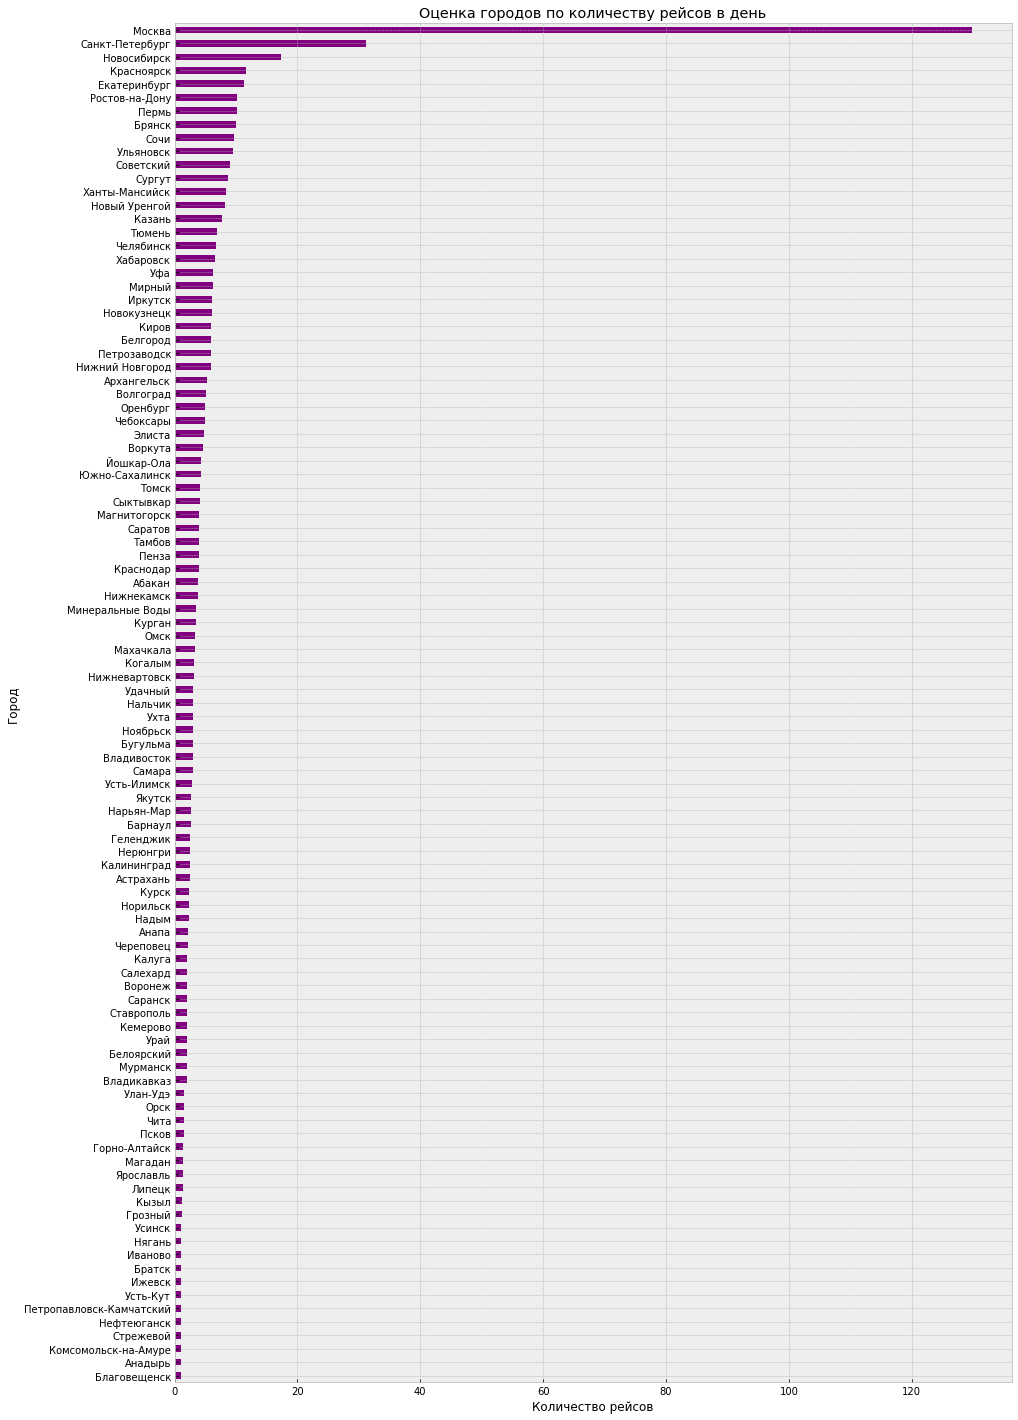

In [12]:
all_city_flights = (average_flights_city.pivot_table(index='city', values='average_flights', aggfunc='sum')
                      .sort_values('average_flights')
                      .plot(kind='barh', title='Оценка городов по количеству рейсов в день', y='average_flights', 
                     figsize=(15, 25), legend=False, color='purple')
                      .set(xlabel='Количество рейсов', ylabel='Город'))

                      

Первый три места по количеству рейсов занимают Москва, Санкт-Петербург и Новосибирск. Далее идут Красноярск, Екатеринбург и Ростов-на-Дону. Остальные города имеют примерно одинаковые значения. Предполагаем, что количество рейсов зависит от многих факторов: география города, город-миллионик, уровень развития, цели и досуг, и многое другое. 

### Вывод
Согласно полученным данным, за указанный период количество рейсов преобладает в Москве. Далее идут Санкт-Петербург и Новосибирск. Остальные города имеют примерно одинаковые значения по количеству рейсов.

Самые распространенные по количеству рейсов следующие модели:

1. Cessna 208 Caravan

2. Bombardier CRJ-200

3. Sukhoi Superjet-100

## Глава 3. Проверка гипотез


In [13]:
# Загружаем новый датасет и изучаем его
data_festivals_week = pd.read_csv('/datasets/query_last.csv')

In [14]:
data_festivals_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [15]:
data_festivals_week.isnull().sum()

week_number      0
ticket_amount    0
festival_week    7
festival_name    7
dtype: int64

In [16]:
data_festivals_week.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Обнаружены пропуски в значениях «названия фестиваля» и «наличие фестиваля на определнной неделе». Мы не будем производить их замену, потому что это приведет к искажению результатов исследования. **Данные пропуски обозначают отсутствие фестиваля в данную неделю.** Поэтому, мы разделим исходные данные на два фрейма: дни когда проходит фестиваль и дни без фестиваля.

In [17]:
data_festivals = data_festivals_week.query('festival_week.isnull() == False', engine = 'python')
data_not_festivals = data_festivals_week.query('festival_week.isnull() == True', engine = 'python')

In [18]:
# Проверяем
print(len(data_festivals))
print(len(data_not_festivals))

3
7


In [19]:
# Находим дисперсию
print('Дисперсия для дней, когда проходил фестиваль =', np.var(data_festivals['ticket_amount']))
print('Дисперсия для дней, когда не было фестиваля =', np.var(data_not_festivals['ticket_amount']))

Дисперсия для дней, когда проходил фестиваль = 12998464.888888888
Дисперсия для дней, когда не было фестиваля = 14694.408163265309


Дисперсия каждой выборки оценена по объединённому датасету из двух выборок, они не равны друг другу.
Поэтому в нашем тесте, параметр «equal_var» мы устанавливаем как «False» — этот параметр считает дисперсии выборок различными.

##### Гипотеза: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

Нулевая гипотеза Н₀:
    - Средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время — одинаковый.
    
Альтернативная гипотеза Н₁:
    - Средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время — отличаются.
    
Пороговая значение alpha (критический уровень стат. значимости) задаем равным 5% (принятное, стандартное значение)

In [20]:
alpha = .05

In [21]:
results = st.ttest_ind(
                data_festivals['ticket_amount'],
                data_not_festivals['ticket_amount'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза не отвергается')

p-значение: 0.377432493172683
Нулевая гипотеза не отвергается


#### Вывод
Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Таким образом, наша гипотеза подтверждается. 


### Финальный вывод
Мы изучили все данные и пришли к следующим выводам:
с 23 июля по 30 сентября 2018 — время основных фестивалей. В этот период количество рейсов значительно преобладает в Москве. Далее идут Санкт-Петербург и Новосибирск. Остальные города имеют примерно одинаковые значения по количеству рейсов. Но это, никак не свзано с фестивалями проходящими в этих городах. Так как, средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

Скорее всего, спрос пассажиров на рейсы в определенные города зависит от других факторов: цены и прочие условия авиакомпаний, уровень развития данного города, цели и досуг пассажиров, развитие других видов транспорта и т.д. 

Самые распространенные по количеству рейсов следующие модели:

1. Cessna 208 Caravan

2. Bombardier CRJ-200

3. Sukhoi Superjet-100